# K-means Clustering

### Import resources and display image

(480, 640, 3)


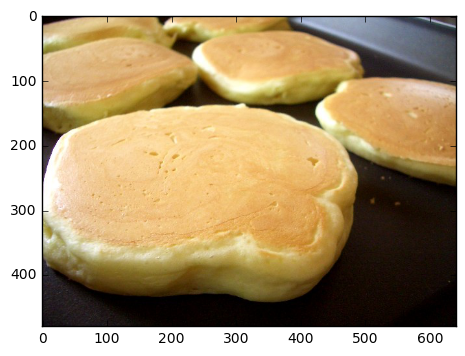

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('images/pancakes2.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)


plt.imshow(image_copy)

print(image_copy.shape)

### Prepare data for k-means

In [ ]:
# Reshape image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image_copy.reshape((-1,3))

# Convert to float type
pixel_vals = np.float32(pixel_vals)


### Implement k-means clustering

In [ ]:
# Define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Perform k-means clustering
k = 10
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
""
# Reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image_copy.shape))
labels_reshape = labels.reshape(image_copy.shape[0], image_copy.shape[1])

 
plt.imshow(segmented_image)

In [ ]:
# Visualize one segment

plt.imshow(labels_reshape==5, cmap='gray')

In [ ]:
# Mask image segment

masked_image = np.copy(image_copy)

masked_image[labels_reshape == 5] = [0, 255, 0]

# Display it!
plt.imshow(masked_image)

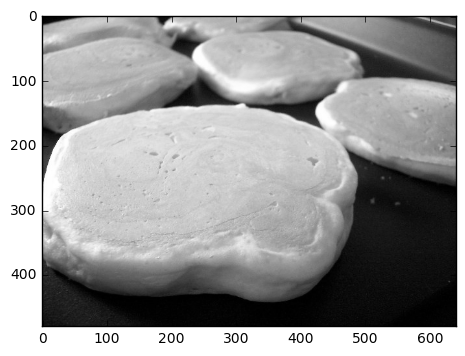

In [7]:
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

(0, 256)

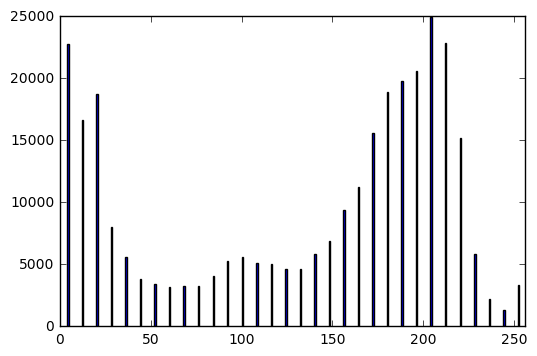

In [8]:


# Take histograms 
gray_hist = np.histogram(gray, bins=32, range=(0, 256))

# Generating bin centers
bin_edges = gray_hist[1]
bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2

plt.bar(bin_centers, gray_hist[0])
plt.xlim(0, 256)

